Simulating the volcano eruption on climate radative forcings and temoperature response. This model is based on using the Douglass equation, and integrate the residuals between the miller's data and shifted data.

Set the working directory

In [1]:
% reset -f
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from IPython.display import Image
from jdcal import gcal2jd, jd2gcal
from scipy.integrate import quad
import math
import sympy
import string
import itertools
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import curve_fit
import time
os.chdir('C:\\Users\\cd7\\Desktop\\newvol')

In [2]:
df1 = pd.read_excel('cage19volcano1750-2015jan31.xlsx')
df1.to_csv('cage19volcano1750-2015jan31.csv',header=False,index=False)
df1 = pd.read_csv('cage19volcano1750-2015jan31.csv')
df1.drop(df1.index[[-1]],inplace=True)
# print (df1)

In [3]:
# Image(filename='LeanRind2008-2.jpg')

Extract information from read-in files, There are two lists of each type, because the years in column 1 sometimes have two volcanoes included in the same year.

Integrate the residuals by using my model. In this case, the volcanic forcing formula are separate 54 delta functions. The same equations are used in this code as in master thesis work.

In [4]:
yrsmiller = df1.iloc[:,0:1].round()
miller = df1.iloc[:,2]
so2ratio1plus = df1.iloc[:,4] # (* multiplier of Douglas' Pinatubo forcing formula *)
so2ratio2plus = df1.iloc[:,13]

month1plus = df1.iloc[:,8:9].round()    #(* month and day of eruption *)
month2plus = df1.iloc[:,17:18].round()

day1plus = df1.iloc[:,9]
day1plus = day1plus.tolist()
day1plus = list(map(float, day1plus))
day1plus = [round(x) for x in day1plus]

day2plus = df1.iloc[:,18:19].round()

name1plus =  df1.iloc[:,3] # (* volcano name *)
name2plus = df1.iloc[:,12]

type1plus = df1.iloc[:,5] # (* 1 for above 50 degrees north, 0 otherwise *)
type2plus = df1.iloc[:,14]

delay1plus = df1.iloc[:,11] #(* extra delay in years for December northern hemisphere volcanoes which occur in list 1 only *)
# The negative of the forcing in miller is the shielding fmiller
fmiller = miller.tolist()
fmiller = list(map(float, fmiller))
fmiller = [-x for x in fmiller]


# Find positions of the positive multipliers, and numbers of each, and extract the corresponding volcano parameters
i11 = np.array(so2ratio1plus, dtype=pd.Series)
i11 = i11.astype(np.float)
i1 = np.flatnonzero(i11)


i22 = np.array(so2ratio2plus, dtype=pd.Series)

i22 = i22.astype(np.float)
i2 = np.flatnonzero(i22)

n1 = i1.shape
n2 = i2.shape


out1 = 'cage19small';
out2 = 'cooling';
out3 = 'cage19large';
out4 = 'cage19volcanic';
out5 = 'episodes';
out6 = 'ratios';
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] # abbreviations for months to insert in output file name
date = datetime.date.today().strftime("%Y-%m-%d")
date_split = date.split('-') # split the date string we create by symbol "-"
yrs = str(int(date_split[0])-2000) # real years minus 2000 

seq1 = [out1, yrs, out2,months[int(date_split[1])-1],date_split[2]]
seperator = ','
filename1 = seperator.join(seq1).replace(',', '')

seq2 = [out3, yrs, out2,months[int(date_split[1])-1],date_split[2]]
seperator = ','
filename2 = seperator.join(seq2).replace(',', '')

seq3 = [out4, yrs, out5,months[int(date_split[1])-1],date_split[2]]
seperator = ','
filename3 = seperator.join(seq3).replace(',', '')

seq4 = [out4, yrs, out6,months[int(date_split[1])-1],date_split[2]]
seperator = ','
filename4 = seperator.join(seq4).replace(',', '')

In [5]:
yr1 = []
for i in i1:
    x = yrsmiller.iloc[i,0]
    yr1.append(int(x))
#print (yr1)

yr2 = []
for i in i2:
    x = yrsmiller.iloc[i,0]
    yr2.append(int(x))
#print (yr2)

name1 = []
for i in i1:
    x = name1plus[i]
    name1.append(x)
#print (name1)

name2 = []
for i in i2:
    x = name2plus[i]
    name2.append(x)
#print (name2)

ratio1 = []
for i in i1:
    x = so2ratio1plus[i]
    ratio1.append(x)
# print (ratio1)

ratio2 = []
for i in i2:
    x = so2ratio2plus[i]
    ratio2.append(x)
    
month1 = []
for i in i1:
    x = month1plus.iloc[i,0]
    month1.append(x)

month2 = []
for i in i2:
    x = month2plus.iloc[i,0]
    month2.append(x)

day1 = []
for i in i1:
    x = day1plus[i]
  #  x = day1plus.iloc[i,0]
    day1.append(x)
#print (day1)

day2 = []
for i in i2:
    x = day2plus.iloc[i,0]
    day2.append(x)

type1 = []
for i in i1:
    x = type1plus[i]
    type1.append(x)
print (type1)

type2 = []
for i in i2:
    x = round(float(type2plus[i]))
    type2.append(x)
print (type2)

delay1 = []
for i in i1:
    x = delay1plus[i]
    delay1.append(x)
# print (delay1)
    
delay2 = [0*float(x) for x in type2]
#print (delay2)

['0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0']
[0, 0, 0, 0, 1, 0, 0, 0, 0]


In [6]:
days1 = []
days11 = []
days12 = []
days2 = []
days21 = []
days22 = []

fmt = '%Y.%m.%d'
for i in range(0,len(i1)):
    s = ''.join([str(yr1[i]),'.', str(month1[i]),'.',str(day1[i])])
    dt = datetime.datetime.strptime(s, fmt)
    days11_temp = sum(gcal2jd(dt.year, dt.month, dt.day))
    days11.append(days11_temp)

for i in range(0,len(i1)):
    s = ''.join([str(yr1[i]),'.', '1','.','1'])
    dt = datetime.datetime.strptime(s, fmt)
    days12_temp = sum(gcal2jd(dt.year, dt.month, dt.day))
    days12.append(days12_temp)

for i in range(0,len(i1)):
    days1_temp = days11[i]-days12[i]
    days1.append(days1_temp)

for i in range(0,len(i2)):
    s = ''.join([str(yr2[i]),'.', str(month2[i]),'.',str(day2[i])])
    dt = datetime.datetime.strptime(s, fmt)
    days21_temp = sum(gcal2jd(dt.year, dt.month, dt.day))
    days21.append(days21_temp)

for i in range(0,len(i2)):
    s = ''.join([str(yr2[i]),'.', '1','.','1'])
    dt = datetime.datetime.strptime(s, fmt)
    days22_temp = sum(gcal2jd(dt.year, dt.month, dt.day))
    days22.append(days22_temp)

for i in range(0,len(i2)):
    days2_temp = days21[i]-days22[i]
    days2.append(days2_temp)

leap1  = [1 + np.sign(-(x%4)) for x in yr1]
leap2  = [1 + np.sign(-(x%4)) for x in yr2]
print (leap1)
date1 = []
for i in range(0,len(yr1)):
    x = yr1[i] + days1[i]/(365 + leap1[i])
    date1.append(x)

date2 = []
for i in range(0,len(yr2)):
    x = yr2[i] + days2[i]/(365 + leap2[i])
    date2.append(x)

[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


Construct Douglas forcing vs. time functions for normal rise and decay parameter tv and >50 Degree north latitude parameter uv 

In [7]:
delay = 0.04
q1991 = 0.439
aup = 21
tv = 0.63 # (* in years *)

#t = sympy.Symbol('t')
def qoft(t,t1):
    return q1991*((t - t1)/tv)*np.exp(-(t - t1)/tv)

def df(t,t1):
    return aup*qoft

# print (sympy.integrate(df, t))

def fint(x1,x2):
    y =  5.80797 + (9.219*(x1 - x2) - 5.80797)*np.exp(-(x2 - x1)/tv)
    return y

def fy(t0, t1, t2):
    y = fint(t0, t2) - fint(t0, t1)
    return y

print (fy(1750, 1754, 1756))

uv = 0.417 # (* in years *)
def roft(t,t1):
    y = q1991*((t - t1)/uv)*np.exp(-(t - t1)/uv)
    return y

def dg(t,t1):
    return aup*roft

def gint(x1, x2):
    y = 3.84432 + (9.219*(x1 - x2) - 3.84432)*np.exp(-(x2 - x1)/uv)
    return y

def gy(t0, t1, t2):
    y = gint(t0, t2) - gint(t0, t1)
    return y

print (gy(1750, 1754, 1756))

0.0701498518273489
0.0027458252211998158


Add December delay to dates to get effective eruption time in years+fractions of a year

In [8]:
t1 = [ ]
for i in range(0,len(date1)):
    x = date1[i] + float(delay1[i])
    t1.append(x)
    
print (t1)
print (len(t1))
print(t1[58])
t2 = date2

[1754.9232876712329, 1760.6967213114754, 1771.6109589041096, 1778.495890410959, 1783.3671232876711, 1787.6082191780822, 1793.9961643835616, 1796.0, 1801.213698630137, 1804.4972677595629, 1808.9234972677596, 1815.5342465753424, 1831.495890410959, 1835.0520547945205, 1843.0, 1845.668493150685, 1856.0043835616439, 1856.7322404371585, 1861.9890410958903, 1876.0016438356165, 1883.3808219178081, 1885.3945205479451, 1886.027397260274, 1888.535519125683, 1890.0465753424658, 1892.2868852459017, 1896.0245901639344, 1897.3890410958904, 1902.3068493150686, 1907.2356164383561, 1912.4289617486338, 1920.22131147541, 1928.5901639344263, 1929.013698630137, 1932.0546448087432, 1938.1753424657534, 1960.2896174863388, 1961.2739726027398, 1962.5890410958905, 1963.131506849315, 1965.172602739726, 1966.3150684931506, 1968.0710382513662, 1970.1123287671232, 1973.0602739726028, 1974.772602739726, 1978.345205479452, 1981.2246575342465, 1982.2356164383561, 1983.5424657534247, 1986.2328767123288, 1987.98904109589

Integrate forcing over the rest of the eruption year and for jmax full years thereafter, and Join the results together.
This block of coding is designed to decide which large volcano effects to include. Much of it is repeated later for computing rescaling ratios.

In [9]:
itest = 0
i3 = [0, 4, 10, 11, 12, 13, 16, 17, 18, 20, 21, 23, 24, 26, 38, 39, 42, 45, 48]
i4 = [10, 11, 12, 13, 17, 20, 28, 45, 48]

jmax1 = [2+itest]*n1[0]

for i in range(0,len(i3)):
    jmax1[i3[i]] = 3+itest

for i in range(0,len(i4)):
    jmax1[i4[i]] = 4+itest


jmax1[1] = 5 + itest
jmax1[10] = 5 + itest
jmax1[11] = 6 + itest

jmax2 = [3+ itest]*n2[0]
jmax2[0] = 4 + itest
jmax2[2] = 4 + itest
jmax2[3] = 4 + itest
jmax2[4] = 2 + itest
jmax2[7] = 2 + itest
jmax2[8] = 5 + itest

finyr1 = []

for i in range(0,n1[0]):
    x = float(ratio1[i])*((1 - float(type1[i]))*fint(t1[i], math.modf(t1[i] + 1)[1]) + float(type1[i])*gint(t1[i], math.modf(t1[i] + 1)[1]))
    finyr1.append(x)

finyr2 =[]
for i in range(0,n2[0]):
    x = float(ratio2[i])*((1 - float(type2[i]))*fint(t2[i], math.modf(t2[i] + 1)[1]) + float(type2[i])*gint(t2[i], math.modf(t2[i] + 1)[1]))
    finyr2.append(x)

flater1 =[]
for i in range(0,n1[0]):
    sublist = []
    for j in range(1,jmax1[i]+1):
        x = float(ratio1[i])*((1 - float(type1[i]))*fy(t1[i], math.modf(t1[i] + j)[1], math.modf(t1[i] + j + 1)[1]) + float(type1[i])*gy(t1[i], math.modf(t1[i] + j)[1], math.modf(t1[i] + j + 1)[1]))
        sublist.append(x)
    flater1.append(sublist)

flater2 =[]
for i in range(0,n2[0]):
    sublist = []
    for j in range(1,jmax2[i]+1):
        x = float(ratio2[i])*((1 - float(type2[i]))*fy(t2[i], math.modf(t2[i] + j)[1], math.modf(t2[i] + j + 1)[1]) + float(type2[i])*gy(t2[i], math.modf(t2[i] + j)[1], math.modf(t2[i] + j + 1)[1]))
        sublist.append(x)
    flater2.append(sublist)


fboth1 = []
for i in range(0,n1[0]):
    sublist = [finyr1[i]]
    for j in range(0,len(flater1[i])):
        x = flater1[i][j]
        sublist.append(x)
    fboth1.append(sublist)

fboth2 = []
for i in range(0,n2[0]):
    sublist = [finyr2[i]]
    for j in range(0,len(flater2[i])):
        x = flater2[i][j]
        sublist.append(x)
    fboth2.append(sublist)

ftot1 = [sum(x) for x in fboth1]


ftot2 = [sum(x) for x in fboth2]

# fleast = 0.025

Pad the integrated forcings with 0 on the left and right and add all of the forcing to get total forcing fall for all of the nall years. (This includes Miller's estimate and 3 additional years from Schmidt et al.) Note that fall is shielding,  miller is forcing, and fmiller = -miller is shielding.)

In [10]:
nall = len(yrsmiller)
yrsleft1 = [] 
for i in range(0,n1[0]):
    x = math.modf(t1[i])[1] - float(yrsmiller.iloc[0,0]) + jmax1[i] + 1
    yrsleft1.append(x)

yrsleft2 = [] 
for i in range(0,n2[0]):
    x = math.modf(t2[i])[1] -float(yrsmiller.iloc[0,0]) + jmax2[i] + 1
    yrsleft2.append(x)

# padding the list with zeros to the left and right

padded1 = []
for i in range(0,n1[0]):
    fboth1[i] = np.asarray(fboth1[i])
    if int(nall-yrsleft1[i])>0:  
        sublist = np.pad(fboth1[i] ,(int(yrsleft1[i]-len(fboth1[i])),int(nall-yrsleft1[i])), 'constant', constant_values=(0, 0))
        sublist = sublist.tolist()        
    else:
        sublist = np.pad(fboth1[i],(int(yrsleft1[i]-len(fboth1[i])),0), 'constant', constant_values=(0, 0))
        sublist = sublist.tolist()
        sublist=sublist[:(len(sublist)-(int(yrsleft1[i])-nall))]
    
    padded1.append(sublist)

print (len(yrsleft1))
print (len(fboth1))

padded2 = []
for i in range(0,n2[0]):
    fboth2[i] = np.asarray(fboth2[i])
    if int(nall-yrsleft2[i])>0:  
        sublist = np.pad(fboth2[i] ,(int(yrsleft2[i]-len(fboth2[i])),int(nall-yrsleft2[i])), 'constant', constant_values=(0, 0))
        sublist = sublist.tolist()        
    else:
        sublist = np.pad(fboth2[i],(int(yrsleft2[i]-len(fboth2[i])),0), 'constant', constant_values=(0, 0))
        sublist = sublist.tolist()
        sublist=sublist[:(len(sublist)-(int(yrsleft2[i])-nall))]
    
    padded2.append(sublist)

sum_padded1 = [sum(x) for x in zip(*padded1)]
sum_padded2 = [sum(x) for x in zip(*padded2)]
fall = [x + y for x, y in zip(sum_padded1,sum_padded2)]

fmin = 0.05
temp = [x - fmin for x in fall]
switch = (1 + np.sign(temp))/2
switch = switch.tolist()

flarger = [a*b for a,b in zip(fall,switch)]
switch = np.asarray(switch)
ismall = np.flatnonzero(switch)
print (ismall[-1])

59
59
265


Revise the the Douglas type large volcano shielding estimates with rescaling to match the modified IPCC summed shielding estimates for each of the 37 episodes.

In [11]:
redo1 = ratio1
redo2 = ratio2
iredo1 = [[6, 8], [11, 15], [23, 23], [29, 30], [34, 36], [39, 39], [45, 46], [47, 48], [52, 53], [55, 56], [59, 64], [66, 70], [82, 85], [86, 90], [94, 94], [97, 97], [107, 111], [107, 
    111], [113, 115], [127, 128], [134, 144], [134, 144], [134,
    144], [134, 144], [134, 144], [134, 144], [147, 150], [147, 
    150],[147, 150], [153, 157], [158, 159], [163, 165], [171, 
    172], [179, 182], [179, 182], [183, 184], [189, 189], [211, 
    222], [211, 222], [211, 222], [211, 222], [211, 222], [211, 
    222], [211, 222], [211, 222], [224, 228], [224, 228], [229, 
    231], [232, 240], [232, 240], [232, 240], [232, 240], [232, 
    240], [241, 248], [241, 248], [241, 248], [260, 260], [262, 
    263], [265, 266]]

iredo2 = [[134, 144], [134, 144], [153, 157], [211, 222], [211, 
    222], [211, 222], [211, 222], [232, 240], [241, 248]]

iredo1.sort()
iepisodes = list(iredo1 for iredo1,_ in itertools.groupby(iredo1))

yrsmiller = yrsmiller.iloc[:,0]
yrsmiller = yrsmiller.tolist()
yrsmiller = list(map(int, yrsmiller))

yrsepisodes = []
for i in range(0,len(iepisodes)):
    sublist = [] 
    x = yrsmiller[iepisodes[i][0]-1]
    y = yrsmiller[iepisodes[i][1]-1]
    sublist = [x,y]
    yrsepisodes.append(sublist)

ratio1 = [float(i) for i in ratio1]

redo1 = []
for i in range(0,len(ratio1)):
    sublist1 = []
    sublist2 = []
    for j in range(iredo1[i][0]-1, iredo1[i][1]):
        x = fmiller[j]
        sublist1.append(x)
        y = flarger[j]
        sublist2.append(y)
    sum1 = sum(sublist1)
    sum2 = sum(sublist2)
    division = sum1/sum2
    res = division*ratio1[i]
    redo1.append(res)

Check for large changes in ratio. To check that the procedure is near convergence, put the new ratios as preliminary estimates in the input file and repeat the calculation.

In [12]:
ratio2 = [float(i) for i in ratio2]
redo2 = []
for i in range(0,len(ratio2)):
    sublist1 = []
    sublist2 = []
    for j in range(iredo2[i][0]-1, iredo2[i][1]):
        x = fmiller[j]
        sublist1.append(x)
        y = flarger[j]
        sublist2.append(y)
    sum1 = sum(sublist1)
    sum2 = sum(sublist2)
    division = sum1/sum2
    res = division*ratio2[i]
    redo2.append(res)

refinyr1 = []

for i in range(0,n1[0]):
    x = float(redo1[i])*((1 - float(type1[i]))*fint(t1[i], math.modf(t1[i] + 1)[1]) + float(type1[i])*gint(t1[i], math.modf(t1[i] + 1)[1]))
    refinyr1.append(x)

refinyr2 =[]
for i in range(0,n2[0]):
    x = float(redo2[i])*((1 - float(type2[i]))*fint(t2[i], math.modf(t2[i] + 1)[1]) + float(type2[i])*gint(t2[i], math.modf(t2[i] + 1)[1]))
    refinyr2.append(x)

reflater1 =[]
for i in range(0,n1[0]):
    sublist = []
    for j in range(1,jmax1[i]+1):
        x = float(redo1[i])*((1 - float(type1[i]))*fy(t1[i], math.modf(t1[i] + j)[1], math.modf(t1[i] + j + 1)[1]) + float(type1[i])*gy(t1[i], math.modf(t1[i] + j)[1], math.modf(t1[i] + j + 1)[1]))
        sublist.append(x)
    reflater1.append(sublist)

reflater2 =[]
for i in range(0,n2[0]):
    sublist = []
    for j in range(1,jmax2[i]+1):
        x = float(redo2[i])*((1 - float(type2[i]))*fy(t2[i], math.modf(t2[i] + j)[1], math.modf(t2[i] + j + 1)[1]) + float(type2[i])*gy(t2[i], math.modf(t2[i] + j)[1], math.modf(t2[i] + j + 1)[1]))
        sublist.append(x)
    reflater2.append(sublist)

refboth1 = []
for i in range(0,n1[0]):
    sublist = [refinyr1[i]]
    for j in range(0,len(reflater1[i])):
        x = reflater1[i][j]
        sublist.append(x)
    refboth1.append(sublist)

refboth2 = []
for i in range(0,n2[0]):
    sublist = [refinyr2[i]]
    for j in range(0,len(reflater2[i])):
        x = reflater2[i][j]
        sublist.append(x)
    refboth2.append(sublist)

reftot1 = [sum(x) for x in refboth1]

reftot2 = [sum(x) for x in refboth2]

repadded1 = []
for i in range(0,n1[0]):
    refboth1[i] = np.asarray(refboth1[i])
    if int(nall-yrsleft1[i])>0:  
        sublist = np.pad(refboth1[i] ,(int(yrsleft1[i]-len(refboth1[i])),int(nall-yrsleft1[i])), 'constant', constant_values=(0, 0))
        sublist = sublist.tolist()        
    else:
        sublist = np.pad(refboth1[i],(int(yrsleft1[i]-len(refboth1[i])),0), 'constant', constant_values=(0, 0))
        sublist = sublist.tolist()
        sublist=sublist[:(len(sublist)-(int(yrsleft1[i])-nall))]
    
    repadded1.append(sublist)

repadded2 = []
for i in range(0,n2[0]):
    refboth2[i] = np.asarray(refboth2[i])
    if int(nall-yrsleft2[i])>0:  
        sublist = np.pad(refboth2[i] ,(int(yrsleft2[i]-len(refboth2[i])),int(nall-yrsleft2[i])), 'constant', constant_values=(0, 0))
        sublist = sublist.tolist()        
    else:
        sublist = np.pad(refboth2[i],(int(yrsleft2[i]-len(refboth2[i])),0), 'constant', constant_values=(0, 0))
        sublist = sublist.tolist()
        sublist=sublist[:(len(sublist)-(int(yrsleft2[i])-nall))]
    
    repadded2.append(sublist)

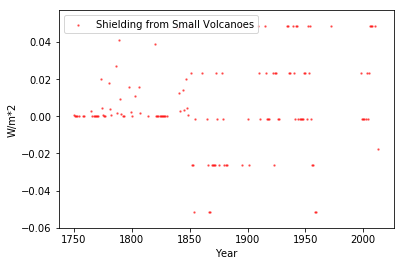

In [13]:
iall = list(range(1, nall+1))

exlist = []
for i in range(0, len(iredo1)):
    sublist = []
    sublist = iall[iredo1[i][0]-1:iredo1[i][1]]
    exlist.append(sublist)

flat_exlist = [item for sublist in exlist for item in sublist]
    
ismall = [x for x in iall if x not in flat_exlist]

fsmall = []
for i in range(0,len(ismall)):
    x = fmiller[ismall[i]-1]
    fsmall.append(x)

yrssmall = []
for i in range(0,len(ismall)):
    x = yrsmiller[ismall[i]-1]
    yrssmall.append(x)

plt.scatter(yrssmall, fsmall, s=2, c='r', alpha = 0.5, label="Shielding from Small Volcanoes",marker='o')
plt.xlabel('Year')
plt.ylabel('W/m*2')
plt.legend(loc='best')
plt.savefig('smallVol.eps',dpi=300)    

Estimate small volcano cooling effect (or heating when negative) with respect to c. 1750 small volcano level.

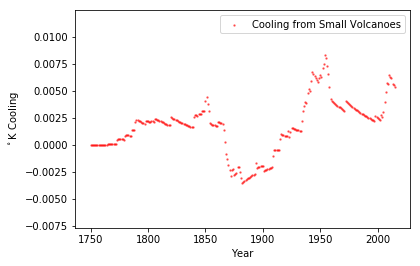

In [14]:
lambda1 = 0.85
t0 = 41.48
yr = 1
c0 = lambda1*yr/t0

def taui(t,initime,fsmall):
    y = c0*fsmall*np.heaviside(t-initime,1)*np.exp(-(t -initime)/t0)
    return y

tini = list(range(yrsmiller[0], yrsmiller[-1]+1))
sumtaui=[]

for i in range(0, len(tini)):
    sublist = []
    for j in range(0,len(yrssmall)):
        x = taui(tini[i],yrssmall[j],fsmall[j])
        sublist.append(x)
    sumtaui.append(sublist)

sumtaui = [sum(x) for x in sumtaui]
plt.scatter(tini, sumtaui, s=2, c='r', alpha = 0.5, label="Cooling from Small Volcanoes",marker='o')
plt.xlabel('Year')
plt.ylabel('$^\circ$K Cooling')
plt.legend(loc='best')
plt.savefig('smallVolcooling.eps',dpi=300)

Collect annual results and prepare a plot thereof (which looks much like the continuous plot above)

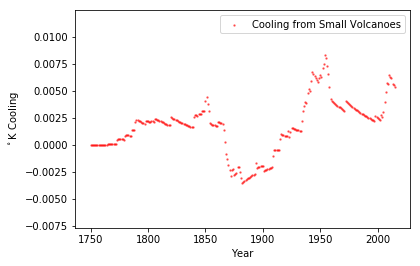

In [15]:
tausmalli = []

for i in range(0, nall):
    sublist = []
    for j in range(0,len(yrssmall)):
        x = taui(yrsmiller[i],yrssmall[j],fsmall[j])
        sublist.append(x)
    tausmalli.append(sublist)

tausmalli = [sum(x) for x in tausmalli]
plt.scatter(yrsmiller, tausmalli, s=2, c='r', alpha = 0.5, label="Cooling from Small Volcanoes",marker='o')
plt.xlabel('Year')
plt.ylabel('$^\circ$K Cooling')
plt.legend(loc='best')
plt.savefig('smallVolcooling2.eps',dpi=300)

Including years with Douglas shielding values less than fmin, find the mean shift of miller values for those years from the miller estimates.

Collect the Douglas formula shieldings flarger that are larger than fmin, and plot those and miller values less the shift and an additional small correction needed to make shift corrected flarger - corrected miller, fdif, has mean 0. (This needs to be rewritten to clarify where that additional correction came from.) 

266
2015
2015.304109589041
[1754.9232876712329, 1760.6967213114754, 1771.6109589041096, 1778.495890410959, 1783.3671232876711, 1787.6082191780822, 1793.9961643835616, 1796.0, 1801.213698630137, 1804.4972677595629, 1808.9234972677596, 1815.5342465753424, 1831.495890410959, 1835.0520547945205, 1843.0, 1845.668493150685, 1856.0043835616439, 1856.7322404371585, 1861.9890410958903, 1876.0016438356165, 1883.3808219178081, 1885.3945205479451, 1886.027397260274, 1888.535519125683, 1890.0465753424658, 1892.2868852459017, 1896.0245901639344, 1897.3890410958904, 1902.3068493150686, 1907.2356164383561, 1912.4289617486338, 1920.22131147541, 1928.5901639344263, 1929.013698630137, 1932.0546448087432, 1938.1753424657534, 1960.2896174863388, 1961.2739726027398, 1962.5890410958905, 1963.131506849315, 1965.172602739726, 1966.3150684931506, 1968.0710382513662, 1970.1123287671232, 1973.0602739726028, 1974.772602739726, 1978.345205479452, 1981.2246575342465, 1982.2356164383561, 1983.5424657534247, 1986.2328

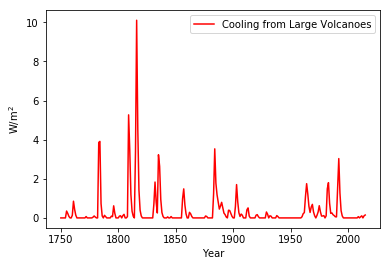

In [16]:
trips = []
for i in range(0,nall):
    trips.append([i,yrsmiller[i], flarger[i]])

sumrepadded1 = [sum(x) for x in zip(*repadded1)]
sumrepadded2 = [sum(x) for x in zip(*repadded2)]
refall = [sum(x) for x in zip(sumrepadded1,sumrepadded2)]

flarger = [a*b for a,b in zip(refall, switch)]
plt.plot(yrsmiller, flarger, c='r', label="Cooling from Large Volcanoes")
plt.xlabel('Year')
plt.ylabel('W/m$^2$')
plt.legend(loc='best')
plt.savefig('LargeVolcooling.eps',dpi=300)


print (nall)
print(yrsmiller[265])
print(t1[58])
print(t1)
print (redo1)
print (len(redo1))

Temperature Response

Define, use, and integrate the Douglas temperature response formula, and find a multiplier to make the results by year equal on average to the yearly integrals of cooling read off of a graph in Lean and Rind, linearly interpolated. (This coding needs more detailed internal documentation.)

0.439
--- 0.0 seconds ---


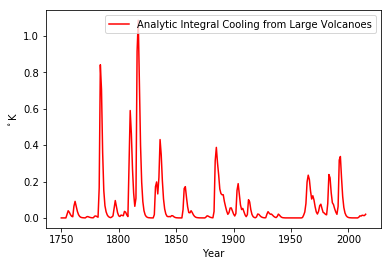

In [17]:
auplambda = 3.72
tau = 0.47
# print (type1)
type1 = [int(x) for x in type1]
print (q1991)
# print (uv)
# print (type2)

# tuv1 = []
tuv1 = [x*(uv-tv)+1 for x in type1]

# tuv2 = []
tuv2 = [x*(uv-tv)+1 for x in type2]


#def dtau1(t,t1,redo1,tuv1):
# def dtau1(x,t1,redo1,tuv1):
#     y = np.heaviside(x-t1)*redo1*q1991*auplambda*tv*tau*(np.exp(-(x-t1)/tau)-(1+((1/tuv1)-(1/tau))*(x-t1))*np.exp(-(x-t1)/tuv1))/((tau-tuv1)**2)
#    # myfun2_re = integrate.quad(lambda t: np.real(np.exp(-(a+t))/(a+t)), 0, np.inf)[0]
#     return y

#dtau1=np.vectorize(dtau1)

# def dtau2(t,t2,redo2,tuv2):
#     y = np.heaviside(t-t2)*redo2*q1991*auplambda*tv*tau*(np.exp(-(t-t2)/tau)-(1+((1/tuv2)-(1/tau))*(t-t2))*np.exp(-(t-t2)/tuv2))/((tau-tuv2)**2)
#     return y 

# def dtau(t,t1,redo1,tuv1,t2,redo2,tuv2):
#     y = dtau1 + dtau2
#     return y

# print(t1[0])
# print(len(t1))
# print(len(redo1))
# print(len(tuv1))
#print (yrsleft1)

start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

dtau1int = []
for i in range(0,nall):
    tlower = yrsmiller[i]
    tupper = yrsmiller[i]+1
    sublist=[]
    for j in range(0,n1[0]):
        t1use = t1[j]
        redo1use = redo1[j]
        tuv1use = tuv1[j]  
        res = quad(lambda x: np.heaviside(x-t1use,1)*redo1use*q1991*auplambda*tv*tau*(np.exp(-(x-t1use)/tau)-(1+((1/tuv1use)-(1/tau))*(x-t1use))*np.exp(-(x-t1use)/tuv1use))/((tau-tuv1use)**2), tlower,tupper)[0]
        sublist.append(res)
    dtau1int.append(sublist)
#print (dtau1int)

dtau2int = []
for i in range(0,nall):
    tlower = yrsmiller[i]
    tupper = yrsmiller[i]+1
    sublist=[]
    for j in range(0,n2[0]):
        t2use = t2[j]
        redo2use = redo2[j]
        tuv2use = tuv2[j]
        res = quad(lambda x: np.heaviside(x-t2use,1)*redo2use*q1991*auplambda*tv*tau*(np.exp(-(x-t2use)/tau)-(1+((1/tuv2use)-(1/tau))*(x-t2use))*np.exp(-(x-t2use)/tuv2use))/((tau-tuv2use)**2), tlower,tupper)[0]
        sublist.append(res)
    dtau2int.append(sublist)
#print (dtau2int)

sumdtau1int = [sum(x) for x in dtau1int]
sumdtau2int = [sum(x) for x in dtau2int]
#print (sumdtau1int)
#print (len(sumdtau2int))
dtaui = [sum(x) for x in zip(sumdtau1int, sumdtau2int)]
# print (dtaui)
# print (len(dtaui))
plt.plot(yrsmiller,dtaui, c='r', label="Analytic Integral Cooling from Large Volcanoes")
plt.xlabel('Year')
plt.ylabel('$^\circ$K')
plt.legend(loc='best')
plt.savefig('LargeVolcoolingint.eps',dpi=300)
# print (len(dtau2int[0]))
# print (len(dtau1int[0]))

0.006711409395973152


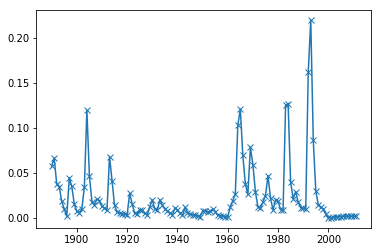

[1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1896, 1897, 1898, 1899, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1912, 1913, 1914, 1920, 1921, 1922, 1929, 1930, 1932, 1933, 1938, 1939, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 2009]
66
range(1890, 2002)
[1890, 1891, 1892, 1893, 1894, 1896, 1897, 1898, 1899, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1912, 1913, 1914, 1920, 1921, 1922, 1929, 1930, 1932, 1933, 1938, 1939, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995]
[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 22, 23, 24, 30, 31, 32, 39, 40, 42, 43, 48, 49, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 9

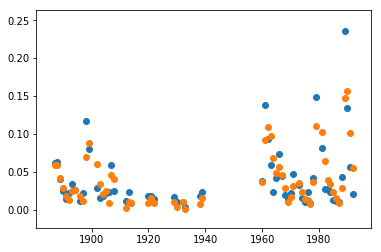

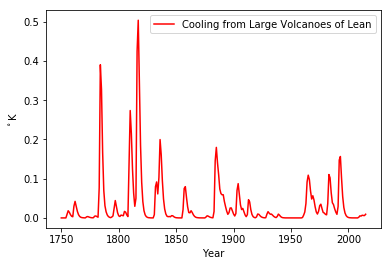

In [29]:
raw = [["51.38", "267"], ["51.77", "260.4"],["53.52","259.4"],["53.76", "264.8"], ["54.92", "258.4"], ["55.25", 
    "261.3"],["57.12", "259.5"], ["58.41", "265."], ["59.81", 
    "263.8"], ["61.86", "267.1"], ["64.51", "268.5"], ["68.24", 
    "270.4"], ["69.99", "263.5"], ["71.69", "266.3"], ["72.74", 
    "265.1"], ["74.88", "268.2"], ["77.71", "269.6"], ["81.64", 
    "269.6"], ["84.73", "264.9"], ["84.74", "253.7"], ["86.14", 
    "249.3"], ["88.7", "262.4"], ["90.82", "267.5"], ["93.38", 
    "268.5"], ["95.13", "267.8"], ["97.11", "267."], ["101.1", 
    "268.6"],["106.9", "269.3"], ["108.2", "259.7"], ["109.9", 
    "262.6"], ["111.4", "267."], ["114.", "269.5"], ["125.5", 
    "270."], ["127.2", "266.1"], ["131.1", "269.7"],["134.6", 
    "269.8"], ["136.5", "269.1"], ["138.4", "269.1"], ["140.2", 
    "269.6"], ["144.2", "270.1"], ["147.3", "267.6"], ["149.7", 
    "267.4"],["150.7", "269."], ["153.5", "269.3"], ["155.3", 
    "267.4"], ["158.9", "268.8"], ["167.5", "270."], ["168.4", 
    "268.6"], ["177.", "270.1"], ["179.6", "268.5"], ["181.9", 
    "269.8"], ["194.2", "270.3"], ["196.9", "268.7"], ["199.5", 
    "269.9"], ["201.3", "269.2"], ["204.1", "269.6"], ["205.8", 
    "268.8"], ["209.2", "270."], ["220.9", "270.4"], ["222.2", 
    "268."], ["224.8", "267.5"], ["226.4", "266.5"], ["228.", 
    "267.5"],["228.8", "257.1"], ["229.4", "247.6"], ["230.3", 
    "248.9"],["233.3", "259.7"], ["235.7", "262.6"], ["236.6", 
    "268.7"], ["238.", "266.2"], ["239.1", "267.3"], ["241.", 
    "257.6"], ["246.", "267.1"], ["248.8", "269.5"], ["253.8", 
    "267.3"], ["255.4", "266.6"], ["256.2", "261."], ["258.6", 
    "266.2"], ["261.1", "268.5"], ["263.1", "269.9"], ["264.1", 
    "267.8"],["265.8", "266.5"], ["267.9", "269.1"], ["272.8", 
    "269.1"], ["273.6", "253.6"], ["275.2", "245.1"], ["277.3", 
    "257.5"], ["278.9", "265.8"], ["281.6", "267.7"], ["282.4", 
    "265.4"], ["286.9", "268.7"], ["294.2", "269.1"], ["295.1", 
    "250."], ["295.6", "237.9"], ["296.1", "230.6"],["297.6", 
    "237.5"],["298.7", "252.3"], ["300.7", "260.6"], ["302.4", 
    "266.1"], ["304.4", "268.3"], ["309.4", "269."], ["313.7", 
    "270.5"], ["328.9", "270.2"]]
       
century = ["77.32", "314.2"]     
point3 = ["222.4", "267.1"]

century = [float(x) for x in century]
point3 = [float(x) for x in point3]
# raw = [float(x,y) for x,y  in zip(raw)]
raw =[[float(x) for x in sublist] for sublist in raw]

ratio100 = 100/(century[1] - century[0])
ratiokelvin = 0.3/(point3[1] - point3[0])
print (ratiokelvin)
#date = 1900 + ratio100*(ToExpression[raw[[All, 1]]] - century[[1]])
date = [(x- century[0])*ratio100+1900 for x in list(zip(*raw))[0]]

coolraw = [-ratiokelvin*(x-point3[1]) for x in list(zip(*raw))[1]]

cool = [x - min(coolraw) for x in coolraw]

xvals = np.linspace(1890, 2011, 122)
yinterp = np.interp(xvals,date, cool)
plt.plot(xvals, yinterp, '-x')
plt.show()


# Create the interpolator. Use k=1 for linear interpolation.
finterp = InterpolatedUnivariateSpline(date, cool, k=1)
leanbyyr = [finterp.integral(1889+i, 1890+i) for i in range(1,117)]
print(finterp)


flarger = [a*b for a,b in zip(fall,switch)]
switch = np.asarray(switch)
ismall = np.flatnonzero(switch)


leanyrs = range(1890,2002)
iswitch = ismall
ndrop = yrsmiller[-1] - 2011

yrsuse = []
for i in range(0,len(iswitch)):
    x = yrsmiller[iswitch[i]]
    yrsuse.append(x)  

yrsuse = yrsuse[:-ndrop]
yrsuse = yrsuse[61:]
print (yrsuse)

print (len(yrsuse))
print (leanyrs)

# intersection_leanyrs_yrsuse = list(set(leanyrs) & set(yrsuse))
intersection_leanyrs_yrsuse   = sorted(set(leanyrs).intersection(yrsuse))
print (intersection_leanyrs_yrsuse)
iuse = []
for i in range(0,len(intersection_leanyrs_yrsuse)):
    x = leanyrs.index(intersection_leanyrs_yrsuse[i])
    iuse.append(x)
print(iuse)

dtauiforlean = dtaui[(1890-1750):]
dtauiforlean = dtauiforlean[:-(2015-2001)]
print(dtauiforlean)

yrsdtauiforlean = yrsmiller[(1890-1750):]
yrsdtauiforlean = yrsdtauiforlean[:-(2015-2001)]

leanuse = []
for i in range(0,len(iuse)):
    x = leanbyyr[iuse[i]]
    leanuse.append(x)
    
#print (leanuse)

dtauiuse = []
for i in range(0,len(iuse)):
    x = dtauiforlean[iuse[i]]
    dtauiuse.append(x)
print (dtauiuse)

def fit(fix,dtauiuse):
    return fix*dtauiuse

# give the Lower and upper bounds on parameters.
param_bounds=(0,1)
Optimal_values_parameters,estimated_covariance_of_Optimal_parameters = curve_fit(fit,dtauiuse,leanuse,bounds=param_bounds)

print (Optimal_values_parameters)

print (len(yrsuse))
print (len(leanuse))
yrsuse1 = []
for i in range(0,len(leanuse)):
    x = yrsuse[i]
    yrsuse1.append(x)

# print (leanuse[:-(len(leanuse)-len(yrsuse))])
plt.scatter(yrsuse1,leanuse)

result = []
for i in range(0,len(dtauiuse)):
    x = fit(*Optimal_values_parameters,dtauiuse[i])
    result.append(x)

plt.scatter(yrsuse1,result)

plt.figure()
y1 = [x*Optimal_values_parameters for x in dtaui]
plt.plot(yrsmiller,y1, c='r', label="Cooling from Large Volcanoes of Lean")
plt.xlabel('Year')
plt.ylabel('$^\circ$K')
plt.legend(loc='best')
plt.savefig('LargeVolcoolingint.eps',dpi=300)

print("--- %s seconds ---" % (time.time() - start_time))

tripsredo = pd.DataFrame(0, index=np.arange(nall), columns=np.arange(3))
tripsredo.iloc[:,0] = range(1750,2016)

for i in range(0,n1[0]):
    tripsredo.iloc[i1[i],1] = redo1[i]
    
for i in range(0,n2[0]):
    tripsredo.iloc[i2[i],2] = redo2[i]  
print (tripsredo)